In [1]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 26.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 26.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [3]:
# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/duart3x/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/duart3x/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/duart3x/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Perform basic EDA and Data cleaning
- Check for missing values; address any missing data accordingly
- Apply methods to remove stopwords and lemmatize words
- Break-down sentences into words for word-level analysis


In [24]:
# Load the dataset [term, url, text]
df = pd.read_csv('results-publico.csv', header=0)

# Check for missing values; address any missing data if necessary
has_missing = df.isnull().values.any()
if has_missing:
    print('Missing values found. Dropping rows with missing values.')
    df.dropna(inplace=True)
else:
    print('No missing values found.')
df['text'] = df['text'].str.strip().str.lower()
df.drop_duplicates(subset='text', keep='first', inplace=True)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('portuguese'))

stop_words.add('vai')
stop_words.add('jornal')
stop_words.add('jornalista')
stop_words.add('jornalistas')
stop_words.add('pt')
stop_words.add('rsf')
stop_words.add('aacs')
stop_words.add('ainda')
stop_words.add('ano')
stop_words.add('hoje')
stop_words.add('dia')
stop_words.add('ter')
stop_words.add('sobre')
stop_words.add('doi')
stop_words.add('ontem')
stop_words.add('onde')
stop_words.add('um')
stop_words.add('dois')
stop_words.add('três')
stop_words.add('quatro')
stop_words.add('cinco')
stop_words.add('seis')
stop_words.add('sete')
stop_words.add('oito')
stop_words.add('nove')
stop_words.add('dez')
stop_words.add('porque')
stop_words.add('anos')
stop_words.add('disse')
print(stop_words)

def tokenize(text):    
    for word in word_tokenize(text):
        lword = word.lower()
        if lword.isalpha() and (lword not in stop_words) and (len(lword) > 2):
            lemWord = lemmatizer.lemmatize(lword)
            yield lemWord

# Tokenize the reviews
## Create column with tokens from review
df['tokens'] = df['text'].apply(lambda x: [t for t in tokenize(x)])
df['sentence_count'] = df['text'].apply(lambda x: len(sent_tokenize(x)))


print(len(df))
df.tail()


Missing values found. Dropping rows with missing values.
{'fosse', 'não', 'nós', 'cinco', 'estivera', 'ter', 'já', 'nas', 'ela', 'hajamos', 'ano', 'dez', 'meus', 'ele', 'essas', 'aquele', 'haver', 'ou', 'quatro', 'doi', 'nossas', 'se', 'pt', 'está', 'delas', 'estou', 'terei', 'jornalista', 'terá', 'dois', 'elas', 'hão', 'nos', 'nossa', 'nosso', 'ao', 'tivermos', 'dele', 'fomos', 'dos', 'que', 'será', 'estar', 'até', 'entre', 'esses', 'esse', 'forem', 'isso', 'fora', 'tem', 'tenhamos', 'houve', 'teríamos', 'com', 'dia', 'estiveram', 'seja', 'estavam', 'tínhamos', 'aquela', 'lhes', 'esta', 'estivessem', 'teu', 'isto', 'aquelas', 'ser', 'teriam', 'houvesse', 'éramos', 'este', 'da', 'porque', 'estivéssemos', 'tenha', 'nove', 'esteja', 'seriam', 'tivera', 'houveram', 'deles', 'quem', 'houvemos', 'tenho', 'do', 'for', 'houverem', 'sobre', 'houverá', 'estas', 'seria', 'os', 'aquilo', 'teus', 'eram', 'houvéramos', 'sua', 'uma', 'somos', 'fui', 'dela', 'formos', 'aqueles', 'estiver', 'tuas', 's

,term,url,text,title,tokens,sentence_count
10603,JOSÉ SÓCRATES,https://arquivo.pt/noFrame/replay/200910010603...,avaliações de impacto ambiental em causa a co...,Bruxelas trava projectos turísticos no Alentej...,"[avaliações, impacto, ambiental, causa, comiss...",15
10605,JOSÉ SÓCRATES,https://arquivo.pt/noFrame/replay/200910010619...,na semana que passou fui copiosamente nomeado....,VÃO BATER A OUTRA PORTA! - dn - DN,"[semana, passou, copiosamente, nomeado, editad...",39
10606,JOSÉ SÓCRATES,https://arquivo.pt/noFrame/replay/200909290021...,a petrolífera fechou as contas do ano passado ...,Lucros aumentaram 35% - dn - DN,"[petrolífera, fechou, contas, passado, lucros,...",5
10607,JOSÉ SÓCRATES,https://arquivo.pt/noFrame/replay/200910010727...,convido cada cavalheiro que me está a ler a im...,Cidadãs e reprodutoras? - dn - DN,"[convido, cada, cavalheiro, ler, imaginar, rep...",16
10608,JOSÉ SÓCRATES,https://arquivo.pt/noFrame/replay/200910010613...,portugal antecipou para depois de amanhã a par...,Contigente da GNR deve partir depois de amanhã...,"[portugal, antecipou, amanhã, partida, militar...",13


# Visualization
- Visualize review length, word counts and sentences length using bar plots and
kdeplots
- Plot a bar plot with the top 10 most frequently occuring words
- Plot the top 10 most frequently occuring bi-grams and tri-grams

In [25]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


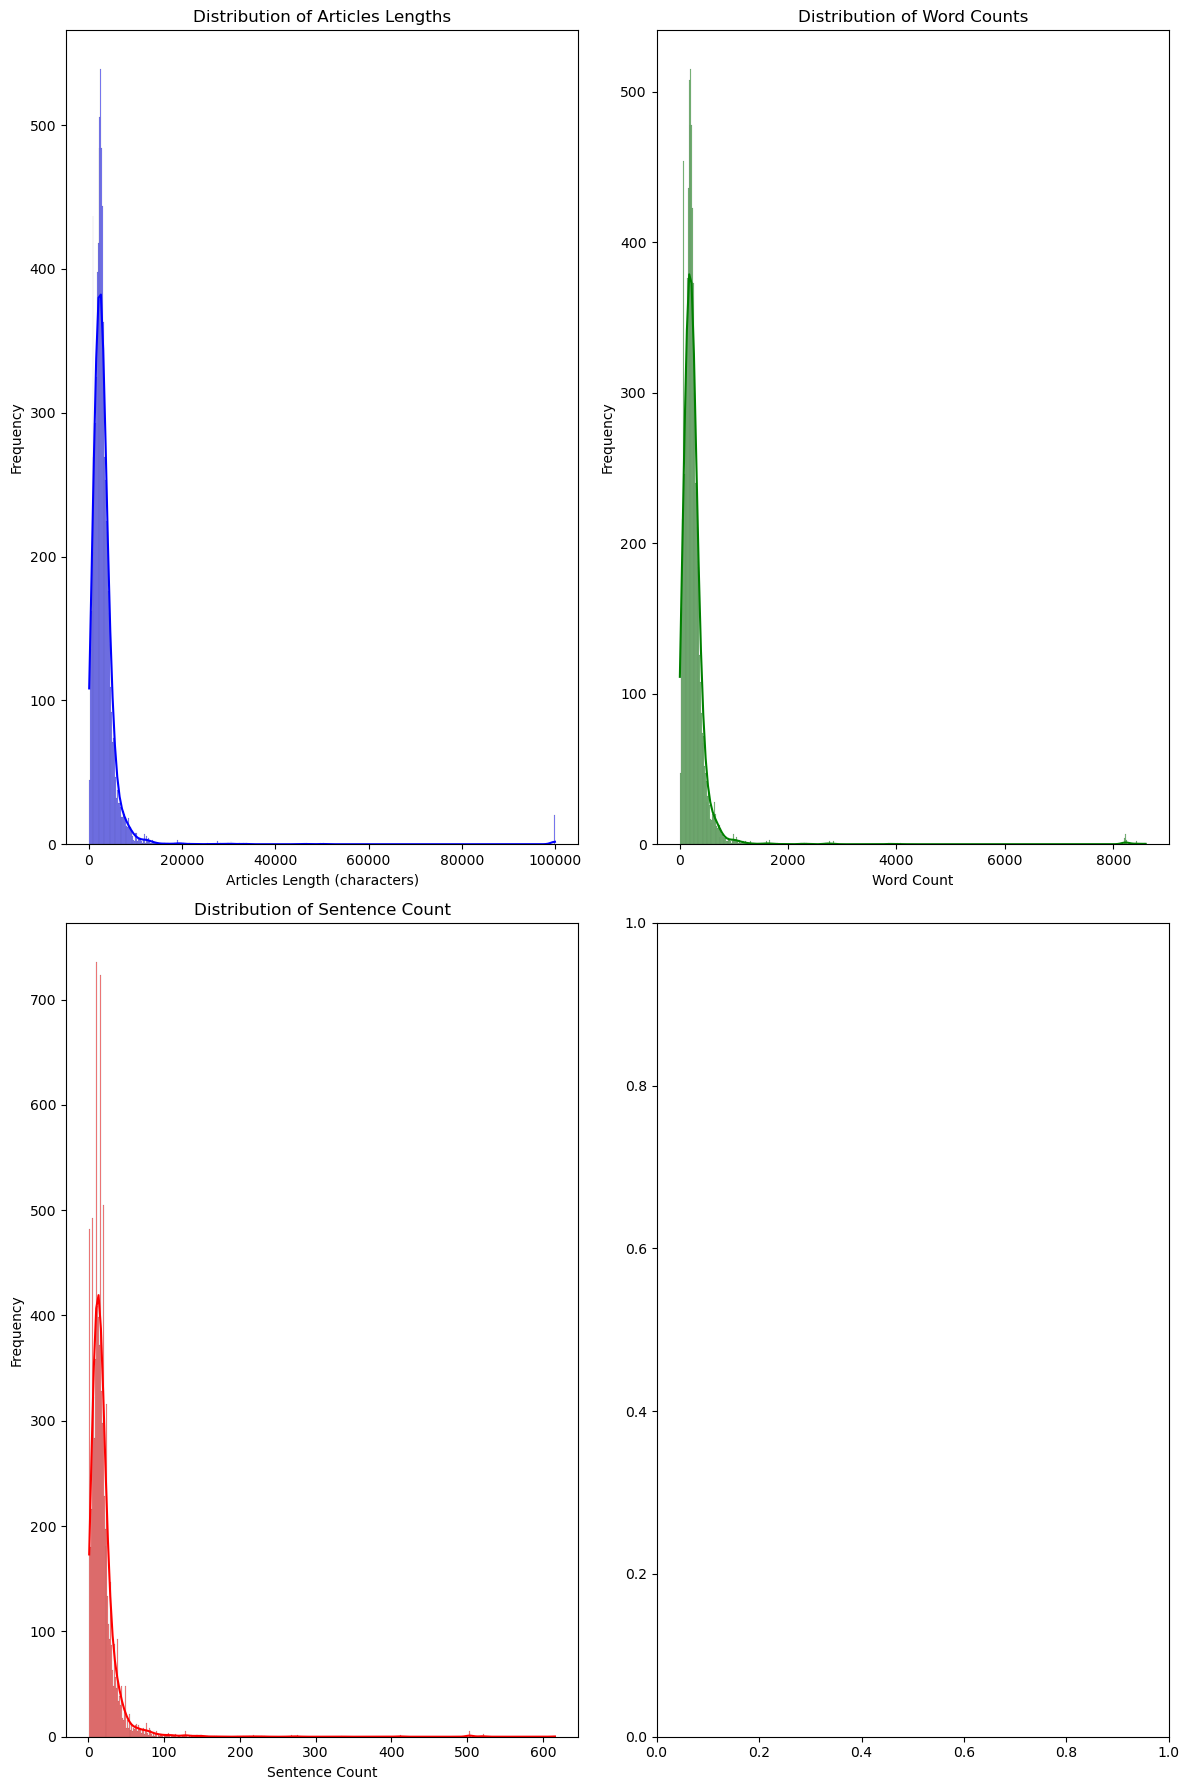

,term,url,text,title,tokens,sentence_count,article_length,word_count
0,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290052...,"de acordo com miguel relvas, guilhermino rodri...",PÚBLICO.PT,"[acordo, miguel, relvas, guilhermino, rodrigue...",12,2509,201
1,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200506211901...,composição do iii governo constitucional toma...,Composição do III Governo Constitucional,"[composição, iii, governo, constitucional, tom...",26,7755,539
2,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290423...,"a proposta, que será apresentada na assembleia...",PÚBLICO.PT,"[proposta, apresentada, assembleia, geral, acc...",14,2739,229
3,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290428...,"na comissão executiva desde o início do ano, h...",PÚBLICO.PT,"[comissão, executiva, desde, início, henrique,...",20,4010,343
4,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200503240713...,público - edição impressa - destaque director...,PUBLICO.PT,"[público, edição, impressa, destaque, director...",1,4681,491


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the review length, word count and sentences length using bar plots and kdeplots
df['article_length'] = df['text'].apply(len)
df['word_count'] = df['tokens'].apply(len)

# Make only one plot with all three sub-plots
fig, axes = plt.subplots(2, 2, figsize=(12, 18), sharey=False)
sns.histplot(df['article_length'], color='blue', fill=True, kde=True, ax=axes[0][0])
axes[0][0].set_title('Distribution of Articles Lengths')
axes[0][0].set_xlabel('Articles Length (characters)')
axes[0][0].set_ylabel('Frequency')

sns.histplot(df['word_count'], color='green', fill=True, kde=True, ax=axes[0][1])
axes[0][1].set_title('Distribution of Word Counts')
axes[0][1].set_xlabel('Word Count')
axes[0][1].set_ylabel('Frequency')

sns.histplot(df['sentence_count'], color='red', fill=True, kde=True, ax=axes[1][0])
axes[1][0].set_title('Distribution of Sentence Count')
axes[1][0].set_xlabel('Sentence Count')
axes[1][0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# # Plotting review length distribution
# plt.figure(figsize=(10, 6))
# sns.histplot(df['review_length'], color='blue', fill=True,kde=True)
# plt.title('Distribution of Review Lengths')
# plt.xlabel('Review Length (characters)')
# plt.ylabel('Frequency')
# plt.show()

# # Plotting word count distribution
# plt.figure(figsize=(10, 6))
# sns.histplot(df['word_count'], color='green', fill=True,kde=True)
# plt.title('Distribution of Word Counts')
# plt.xlabel('Word Count')
# plt.ylabel('Frequency')
# plt.show()

# # Plot Review Length Distribution by Sentence Count
# plt.figure(figsize=(10, 6))
# sns.histplot(df['sentence_count'], color='red', fill=True,kde=True)
# plt.title('Distribution of Sentence Count')
# plt.xlabel('Sentence Count')
# plt.ylabel('Frequency')
# plt.show()

df.head()


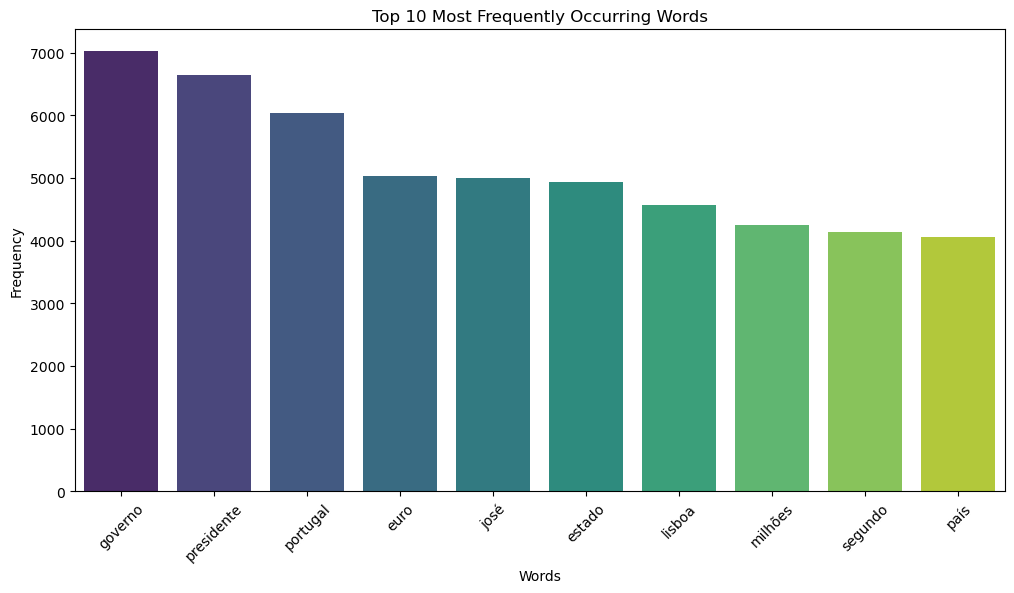

[('governo', 7017), ('presidente', 6642), ('portugal', 6042), ('euro', 5036), ('josé', 4993), ('estado', 4931), ('lisboa', 4563), ('milhões', 4244), ('segundo', 4141), ('país', 4066)]


In [27]:
from collections import Counter

# Most Frequently Occurring Words
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words).most_common(10)

# Bar plot of the Top 10 Most Frequently Occurring Words
words, counts = zip(*word_freq)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis", hue=words)
plt.title('Top 10 Most Frequently Occurring Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
print(word_freq)


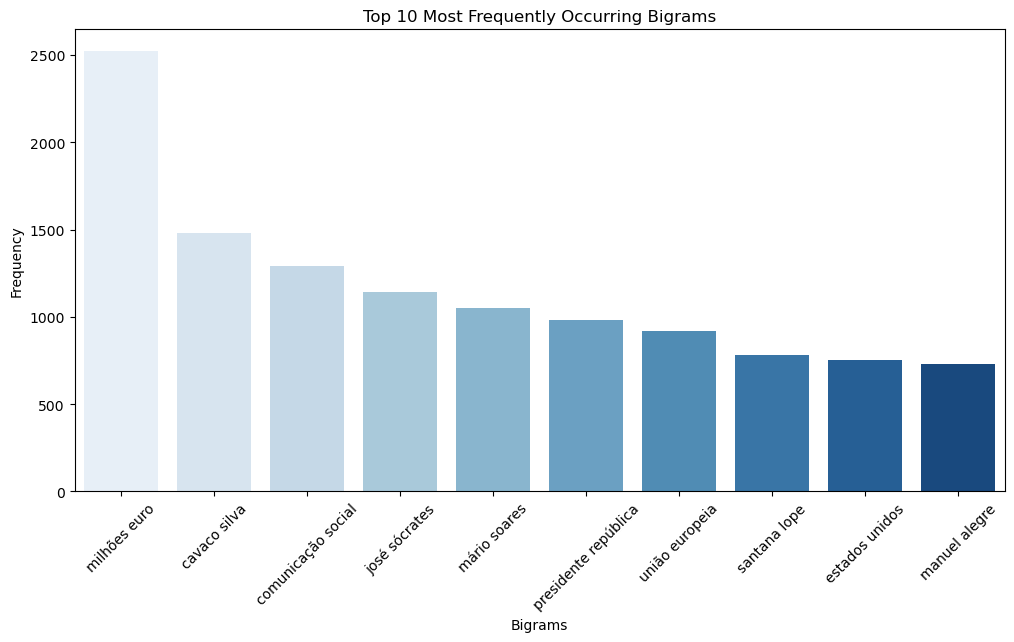

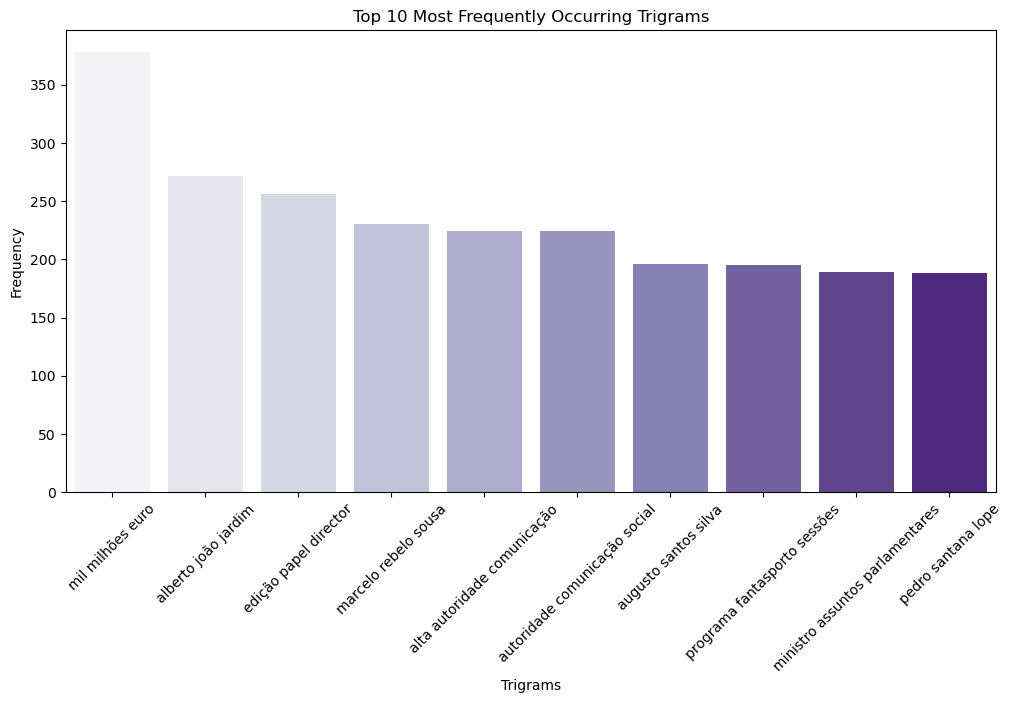

In [28]:
from nltk.util import ngrams

# Most Frequently Occurring Bigrams and Trigrams
bigrams = [bg for tokens in df['tokens'] for bg in ngrams(tokens, 2)]
trigrams = [tg for tokens in df['tokens'] for tg in ngrams(tokens, 3)]

# Top 10 Bigrams
bigram_freq = Counter(bigrams).most_common(10)
bigram_words, bigram_counts = zip(*bigram_freq)
bigram_labels = [' '.join(bigram) for bigram in bigram_words]

plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_labels, y=list(bigram_counts), palette="Blues", hue=bigram_labels)
plt.title('Top 10 Most Frequently Occurring Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Top 10 Trigrams
trigram_freq = Counter(trigrams).most_common(10)
trigram_words, trigram_counts = zip(*trigram_freq)
trigram_labels = [' '.join(trigram) for trigram in trigram_words]

plt.figure(figsize=(12, 6))
sns.barplot(x=trigram_labels, y=list(trigram_counts), palette="Purples", dodge=False, hue=trigram_labels)
plt.title('Top 10 Most Frequently Occurring Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [29]:
pip install spacy

  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [30]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.2 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [31]:
import spacy
from spacy.matcher import PhraseMatcher

In [32]:
nlp = spacy.load("pt_core_news_sm")

politics_keywords = [
    "política", "governo", "eleições", "democracia", "partidos políticos", 
    "parlamento", "presidente", "primeiro ministro", "lei", "ministro", "diplomacia"
]

patterns = [nlp(keyword) for keyword in politics_keywords]

matcher = PhraseMatcher(nlp.vocab)
matcher.add("POLITICS", patterns)

def is_about_politics(article_text):
    doc = nlp(article_text)  
    matches = matcher(doc)  
    if matches:
        return True  
    return False  

df = df[df['text'].apply(is_about_politics)]
print(len(df))

5289


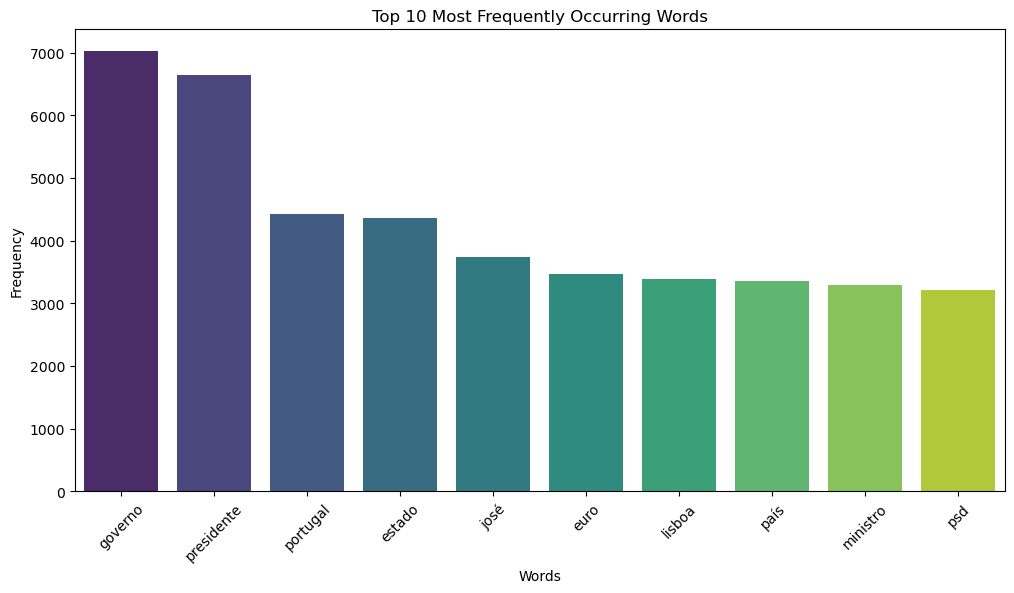

In [33]:

# Most Frequently Occurring Words
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words).most_common(10)

# Bar plot of the Top 10 Most Frequently Occurring Words
words, counts = zip(*word_freq)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis", hue=words)
plt.title('Top 10 Most Frequently Occurring Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

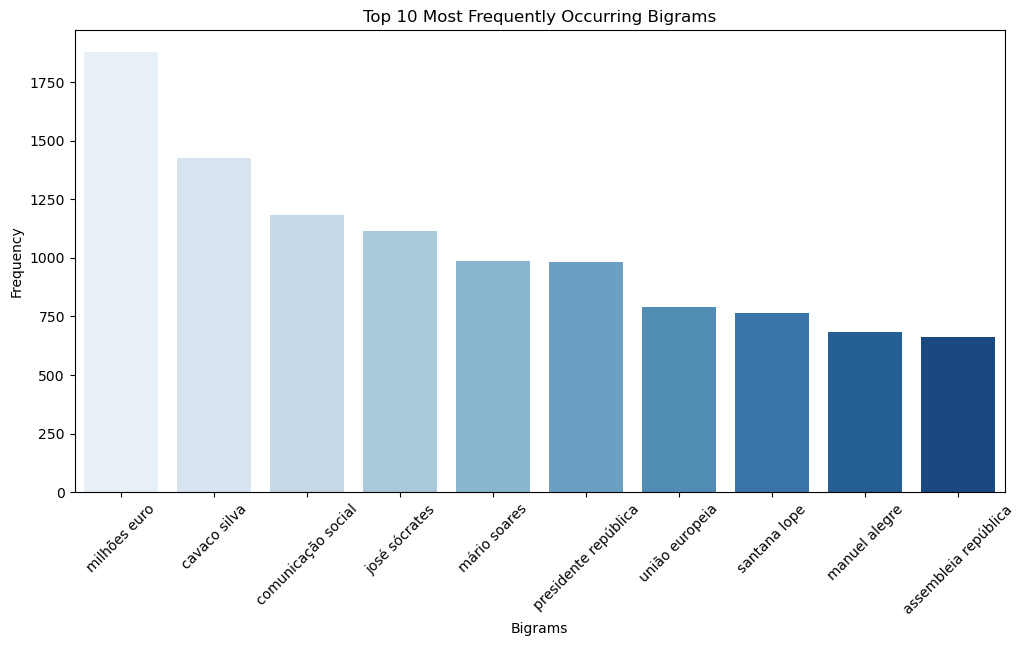

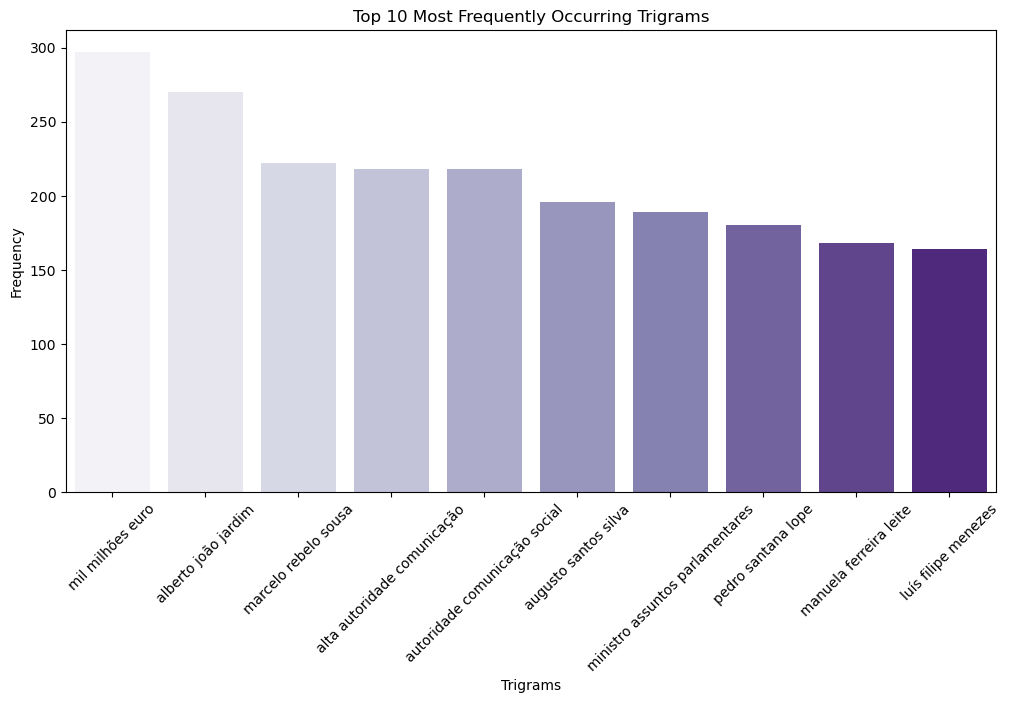

In [34]:

# Most Frequently Occurring Bigrams and Trigrams
bigrams = [bg for tokens in df['tokens'] for bg in ngrams(tokens, 2)]
trigrams = [tg for tokens in df['tokens'] for tg in ngrams(tokens, 3)]

# Top 10 Bigrams
bigram_freq = Counter(bigrams).most_common(10)
bigram_words, bigram_counts = zip(*bigram_freq)
bigram_labels = [' '.join(bigram) for bigram in bigram_words]

plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_labels, y=list(bigram_counts), palette="Blues", hue=bigram_labels)
plt.title('Top 10 Most Frequently Occurring Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Top 10 Trigrams
trigram_freq = Counter(trigrams).most_common(10)
trigram_words, trigram_counts = zip(*trigram_freq)
trigram_labels = [' '.join(trigram) for trigram in trigram_words]

plt.figure(figsize=(12, 6))
sns.barplot(x=trigram_labels, y=list(trigram_counts), palette="Purples", dodge=False, hue=trigram_labels)
plt.title('Top 10 Most Frequently Occurring Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [35]:
pip install wordcloud

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [36]:
from wordcloud import WordCloud

In [37]:
df.head()

,term,url,text,title,tokens,sentence_count,article_length,word_count
0,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290052...,"de acordo com miguel relvas, guilhermino rodri...",PÚBLICO.PT,"[acordo, miguel, relvas, guilhermino, rodrigue...",12,2509,201
1,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200506211901...,composição do iii governo constitucional toma...,Composição do III Governo Constitucional,"[composição, iii, governo, constitucional, tom...",26,7755,539
2,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290423...,"a proposta, que será apresentada na assembleia...",PÚBLICO.PT,"[proposta, apresentada, assembleia, geral, acc...",14,2739,229
3,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290428...,"na comissão executiva desde o início do ano, h...",PÚBLICO.PT,"[comissão, executiva, desde, início, henrique,...",20,4010,343
4,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200503240713...,público - edição impressa - destaque director...,PUBLICO.PT,"[público, edição, impressa, destaque, director...",1,4681,491


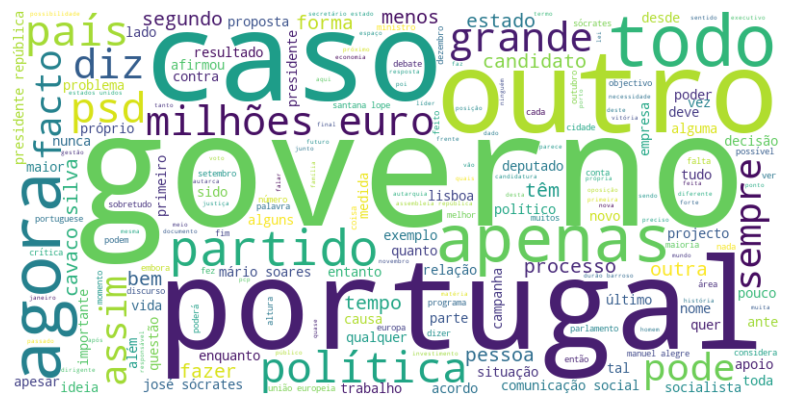

In [38]:
all_text = " ".join(df["tokens"].apply(lambda x: ' '.join(x)))

wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap="viridis"
).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
df.to_csv("results-eda.csv")

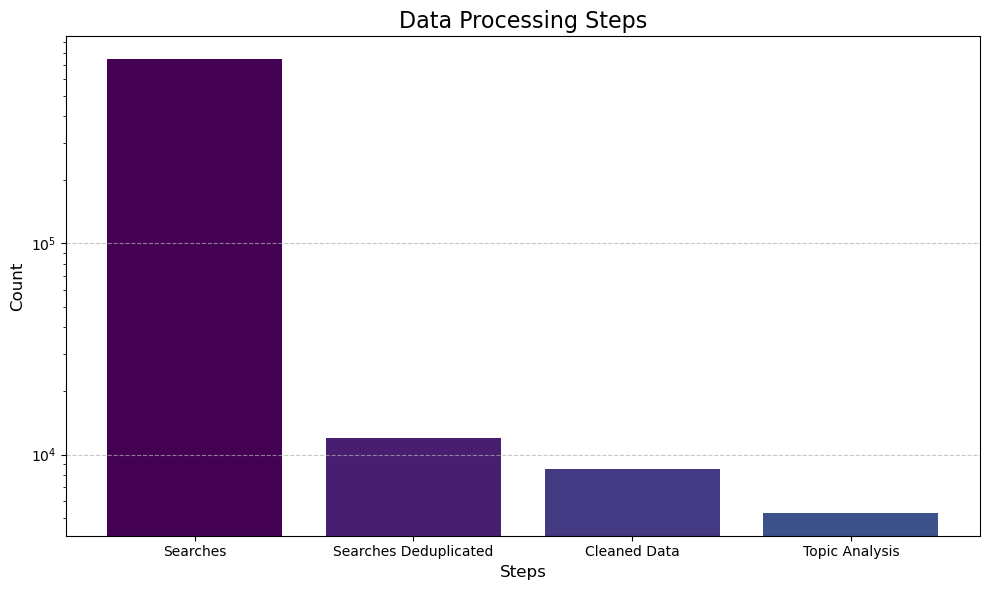

In [40]:
import numpy as np
# Data
steps = ['Searches', 'Searches Deduplicated', 'Cleaned Data', 'Topic Analysis']
values = [747154, 11952, 8584, 5289]
colors = plt.cm.viridis(np.linspace(0, 0.25, len(values)))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(steps, values, color=colors)
plt.title('Data Processing Steps', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Steps', fontsize=12)
plt.yscale('log')  # Using logarithmic scale for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

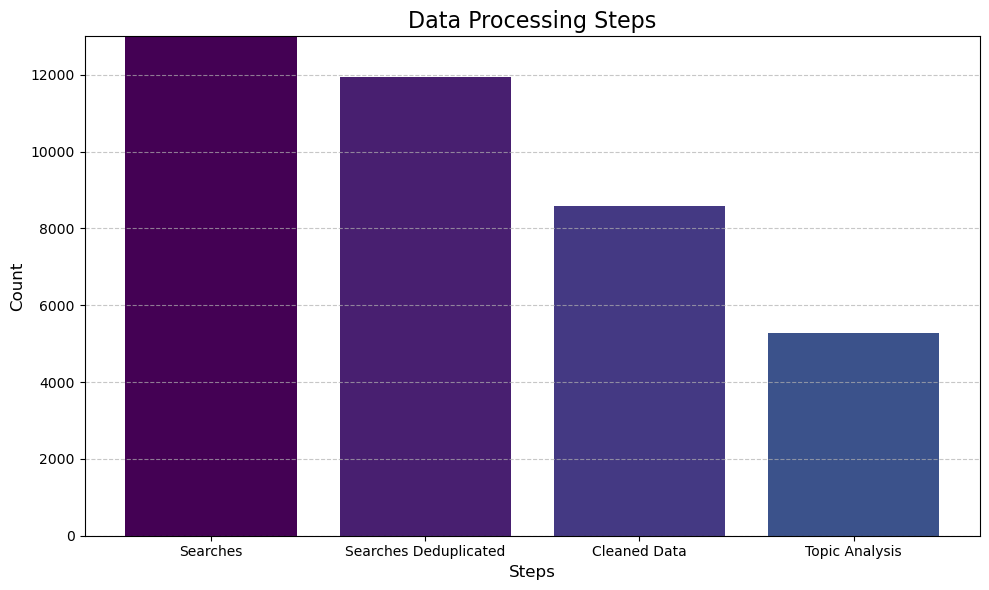

In [41]:

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(steps, values, color=colors)
plt.title('Data Processing Steps', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Steps', fontsize=12)
plt.ylim(0, 13000)  # Limiting y-axis to 12,000
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()